# Problem Statement
- Analyzing property assessment and sales data to make informed real estate decisions. The dataset contains details like assessed value, sale amount, property type, providing valuable insights into the real estate market.

In [63]:
# import the necessary libraries 
import pandas as pd
import numpy as np
# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [64]:
# importing the data
data=pd.read_csv(r"C:\Users\chris\Downloads\Real_Estate_Sales_2001-2020_GL.csv")
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [65]:
#Display general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


In [66]:
#Handle Missing and corrupted values
data.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

In [67]:
# Input missing value in 'property type, Residential type,Non Use Code,Assessor Remarks,OPM remarks,location' columns with the most frequent value
data['Property Type'].fillna(data['Property Type'].mode()[0],inplace=True)
data['Residential Type'].fillna(data['Residential Type'].mode()[0],inplace=True)
data['Non Use Code'].fillna(data['Non Use Code'].mode()[0],inplace=True)
data['Assessor Remarks'].fillna(data['Assessor Remarks'].mode()[0],inplace=True)
data['OPM remarks'].fillna(data['OPM remarks'].mode()[0],inplace=True)
data['Location'].fillna(data['Location'].mode()[0],inplace=True)

In [68]:
# drop row with NaN(missing values) in Address
data=data[data['Address'].notna()]
# drop row with NaN(missing values) in Date Recorded
data=data[data['Date Recorded'].notna()]

In [69]:
data.isnull().sum() 

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Non Use Code        0
Assessor Remarks    0
OPM remarks         0
Location            0
dtype: int64

Missing values has been handled

In [70]:
data.shape

(997162, 14)

In [71]:
# extract the numerical columns from the dataset
num_vars=data.select_dtypes(include=['int64','float64'])
# confirm if there are negative for each columns
num_vars_negative = (num_vars < 0).sum()
print(num_vars_negative)

Serial Number     0
List Year         0
Assessed Value    0
Sale Amount       0
Sales Ratio       0
dtype: int64


Serial Number      47388
List Year              0
Assessed Value     90609
Sale Amount        82897
Sales Ratio       100091
dtype: int64


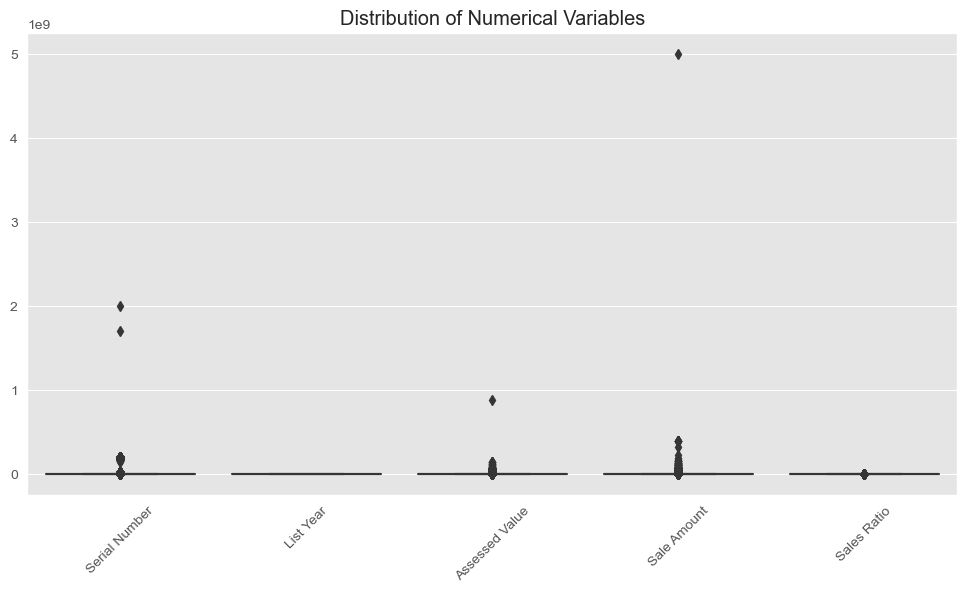

In [72]:
# Handling outliers
num_vars=data.select_dtypes(include=['int64','float64'])
#calculate the number of outliers for each numerical variable
outliers_count = ((num_vars < num_vars.quantile(0.25) - 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))) |
                  (num_vars > num_vars.quantile(0.75) + 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))))
outliers_count = outliers_count.sum()

# Display the number of outliers in a table
print(outliers_count)
# Create a boxplot to show the distribution of each numerical variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

In [73]:
# Identify outliers using the IQR method
Q1 = num_vars.quantile(0.25)
Q3 = num_vars.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with NaN
num_vars_outliers_replaced = num_vars.mask((num_vars < lower_bound) | (num_vars > upper_bound))

In [74]:
# Replace NaN values with median
num_vars_outliers_replaced_median = num_vars_outliers_replaced.fillna(num_vars.median())

Serial Number         0
List Year             0
Assessed Value    45612
Sale Amount       43271
Sales Ratio       48720
dtype: int64


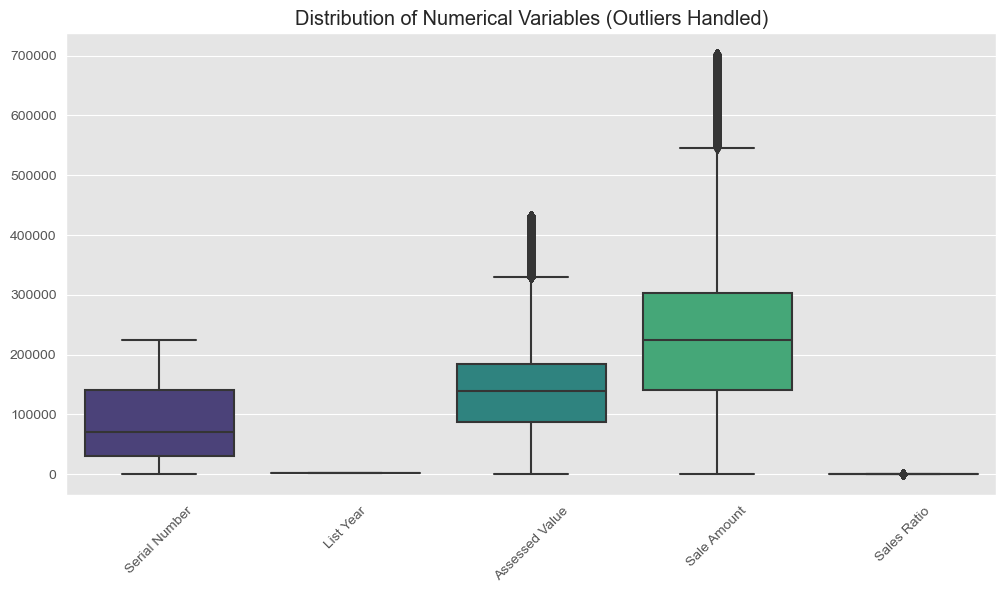

In [75]:
num_vars_outliers_replaced_median
#calculate the number of outliers for each numerical variable
outliers_count = ((num_vars_outliers_replaced_median < num_vars_outliers_replaced_median.quantile(0.25) - 1.5 * (num_vars_outliers_replaced_median.quantile(0.75) - num_vars_outliers_replaced_median.quantile(0.25))) |
                  (num_vars_outliers_replaced_median > num_vars_outliers_replaced_median.quantile(0.75) + 1.5 * (num_vars_outliers_replaced_median.quantile(0.75) - num_vars_outliers_replaced_median.quantile(0.25))))
outliers_count = outliers_count.sum()

# Display the number of outliers in a table
print(outliers_count)

# Create a boxplot to show the distribution of each numerical variable after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars_outliers_replaced_median, palette='viridis')
plt.title('Distribution of Numerical Variables (Outliers Handled)')
plt.xticks(rotation=45)
plt.show()

In [76]:
# Merge num_vars_outliers_replaced_median with the original dataset data
data_merged = data.copy()  # Create a copy of the original dataset

In [77]:
# Update the numerical columns in data_merged with values from num_vars_outliers_replaced_median
data_merged.update(num_vars_outliers_replaced_median)

In [78]:
data_merged.describe().astype('int')

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,997162,997162,997162,997162,997162
mean,85365,2010,145615,236507,0
std,61923,6,84991,140848,0
min,81,2001,0,0,0
25%,30444,2004,87600,140000,0
50%,70304,2010,138390,225000,0
75%,140424,2016,184300,302500,0
max,223932,2020,432550,702500,1


-The dataset consists of 997,162 entries with information on serial numbers, list year, `assessed value`, `sale amount`, and `sales ratio`. The `mean assessed` value is $145,615, mean sale amount is $236,507, with a sales ratio of 0. The data ranges from the year 2001 to 2020, with the highest assessed value being $432,550 and  the `highest sale amount  at $702,500.

In [79]:
data_merged.isnull().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Non Use Code        0
Assessor Remarks    0
OPM remarks         0
Location            0
dtype: int64

# Exploratory Data Analysis
Univariate Analysis

In [80]:
# Property type
property_dist=data_merged['Property Type'].value_counts()
property_dist

Single Family     784009
Condo             105419
Residential        60728
Two Family         26407
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: Property Type, dtype: int64

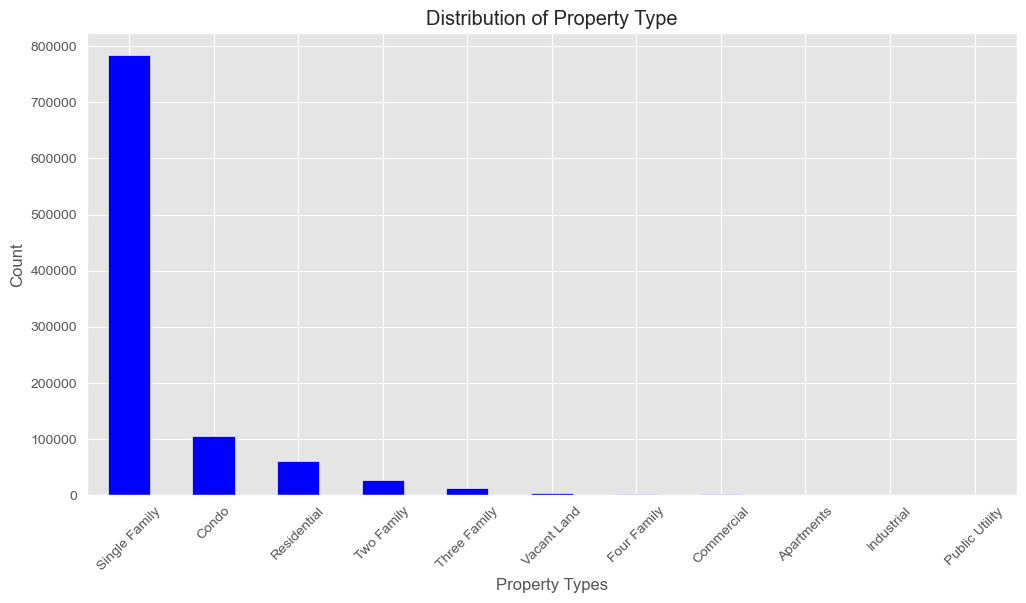

In [81]:
# visualize in a bar chart
property_dist.plot(kind='bar', color='blue', figsize = (12, 6))
plt.xticks(rotation=45)
plt.title('Distribution of Property Type')
plt.xlabel('Property Types')
plt.ylabel('Count')
plt.show()

`Single Family`: There are 784,009 properties classified as single-family homes. Single-family homes typically consist of a single dwelling unit, designed to house one family.

`Condo`: There are 105,419 properties categorized as condominiums. Condos are individual units within a larger complex or building, where each unit is owned separately but shares common areas.

`Residential`: This category includes 60,728 properties designated for residential use. It likely encompasses various types of residential properties beyond single-family homes and condos, such as townhouses or duplexes.

`Two Family`, `Three Family`, `Four Family`: These categories represent properties designed to accommodate multiple families, with 26,407, 12,586, and 2,150 properties, respectively.

`Vacant Land`: There are 3,163 vacant land properties. Vacant land refers to parcels of land that do not have any structures built on them and are typically available for development or other purposes.

`Commercial, Apartments, Industrial, Public Utility`: These categories represent properties used for commercial, apartment buildings, industrial, and public utility purposes, with 1,981, 486, 228, and 5 properties, respectively.

In [82]:
# Residential type
residential_dist=data_merged['Residential Type'].value_counts()
residential_dist

Single Family    833276
Condo            117779
Two Family        29608
Three Family      14081
Four Family        2418
Name: Residential Type, dtype: int64

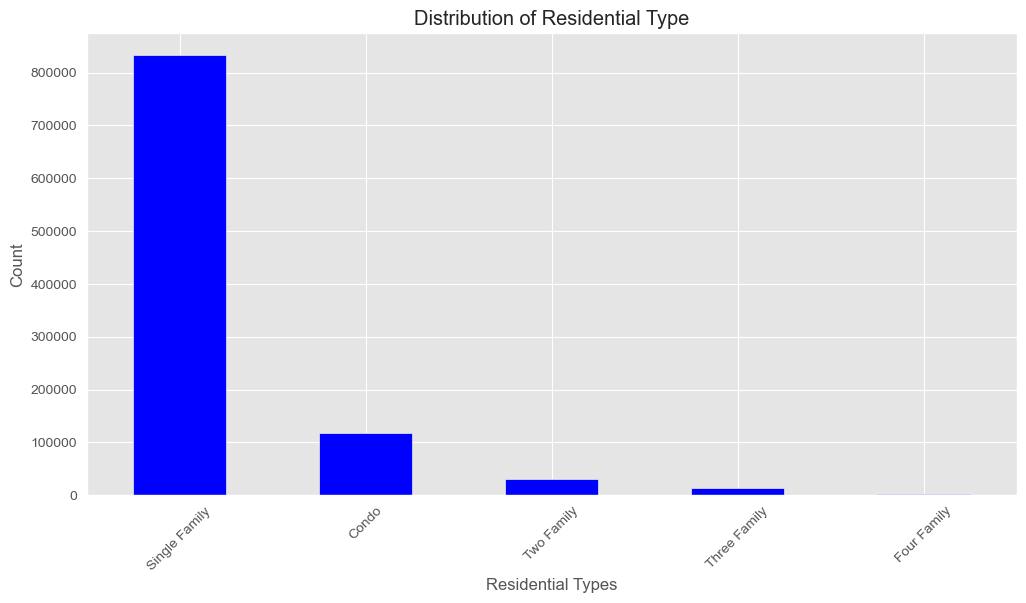

In [83]:
residential_dist.plot(kind='bar', color='blue', figsize = (12, 6))
plt.xticks(rotation=45)
plt.title('Distribution of Residential Type')
plt.xlabel('Residential Types')
plt.ylabel('Count')
plt.show()

`Single Family`: There are 833,276 properties classified as single-family homes. Single-family homes typically consist of a single dwelling unit designed to house one family. They are the most common type of residential property.

`Condo`: There are 117,779 properties categorized as condominiums. Condos are individual units within a larger complex or building where each unit is owned separately but shares common areas such as corridors, lobbies, and amenities.

`Two Family`: There are 29,608 properties designated as two-family homes. These properties have two separate dwelling units, often side by side or stacked vertically, each intended for individual occupancy.

`Three Family`: There are 14,081 properties classified as three-family homes. These properties have three separate dwelling units, each designed to accommodate a single family or household.

`Four Family`: There are 2,418 properties categorized as four-family homes. These properties have four separate dwelling units, providing housing for multiple families within the same structure.

# Bivariate Analysis

In [84]:
# property type by sales Amount
amount_property_type=data_merged.groupby(['Property Type'])['Sale Amount'].mean().round()
amount_property_type

Property Type
Apartments        289743.0
Commercial        260184.0
Condo             203497.0
Four Family       205529.0
Industrial        264662.0
Public Utility    134709.0
Residential       284502.0
Single Family     240506.0
Three Family      171377.0
Two Family        181148.0
Vacant Land       141711.0
Name: Sale Amount, dtype: float64

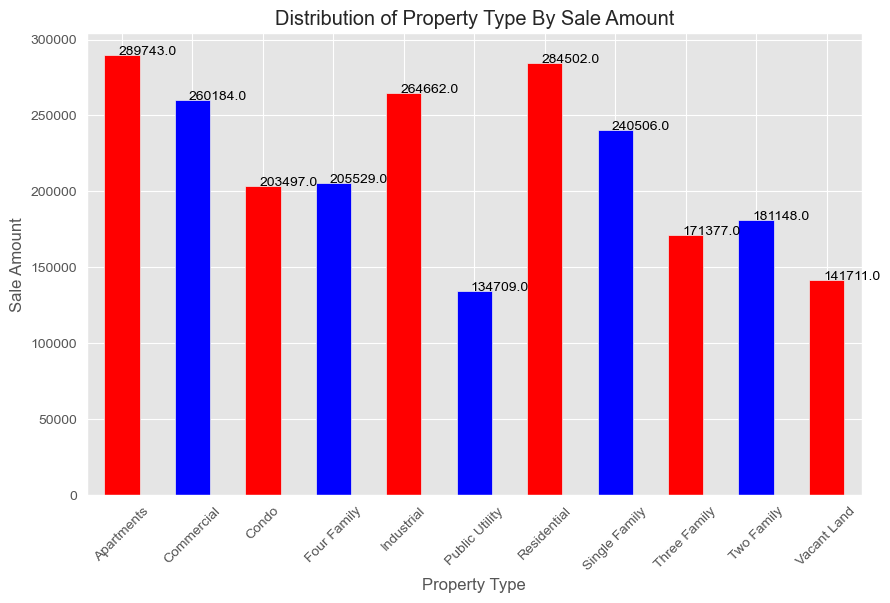

In [85]:
# customize the chart
plt.figure(figsize = (10, 6))
axs = amount_property_type.plot(kind = 'bar', color = ['red', 'blue'])
axs.set_title('Distribution of Property Type By Sale Amount')
axs.set_xlabel('Property Type')
axs.set_ylabel('Sale Amount')

# set tick labels for the axes
axs.set_xticklabels(amount_property_type.index, rotation = 45)
for i in axs.patches:
    axs.text(i.get_x() + 0.2, i.get_height() + 5, str(i.get_height()), fontsize = 10, color = 'black')
    
# Display the plot
plt.show()

From this summary, we can observe the following:

- Apartments, commercial properties, industrial properties, and residential properties have relatively higher sales amounts compared to other property types.
- Public utility and vacant land properties tend to have lower sales amounts compared to other property types.
- The distribution of sales amounts across property types can provide insights into the real estate market dynamics and preferences of buyers in the area.

In [86]:
# Residential type by Sales Amount
residential_sales_amount=data_merged.groupby(['Residential Type'])['Sale Amount'].describe().astype('int')
residential_sales_amount

,count,mean,std,min,25%,50%,75%,max
Residential Type,,,,,,,,
Condo,117779,206595,130643,0,115000,177000,270000,702500
Four Family,2418,213788,132013,0,113075,200000,280000,700000
Single Family,833276,243441,142138,0,149900,225000,312000,702500
Three Family,14081,180695,119758,1671,89500,165000,245000,700000
Two Family,29608,188732,121176,0,100000,170000,245000,701250



The summarized interpretation of the provided data on residential properties' sales prices across various types offers valuable insights into the real estate market dynamics:

- Condo: With a mean sale price of $206,595 and a standard deviation of $130,643, condos are relatively affordable options in the residential market. The distribution indicates a range from $0 to $702,500, with 25% of condos priced below $115,000, 50% below $177,000, and 75% below $270,000.

- Four Family: Despite a slightly higher mean sale price of $213,788, four-family properties exhibit a similar standard deviation of $132,013. The range extends from $0 to $700,000, with 25% of sales below $113,075, 50% below $200,000, and 75% below $280,000.

- Single Family: Single-family homes represent the largest segment, with 833,276 observations. The mean sale price of $243,441 reflects their popularity and slightly higher value compared to other residential types. The standard deviation of $142,138 indicates considerable variability. Prices range from $0 to $702,500, with 25% below $149,900, 50% below $225,000, and 75% below $312,000.

- Three Family: Three-family properties have a mean sale price of $180,695, with a standard deviation of $119,758. Ranging from $1,671 to $700,000, these properties demonstrate diversity in pricing. Twenty-five percent of sales fall below $89,500, 50% below $165,000, and 75% below $245,000.

- Two Family: Two-family properties exhibit a mean sale price of $188,732 and a standard deviation of $121,176. Prices range from $0 to $701,250, with 25% below $100,000, 50% below $170,000, and 75% below $245,000.

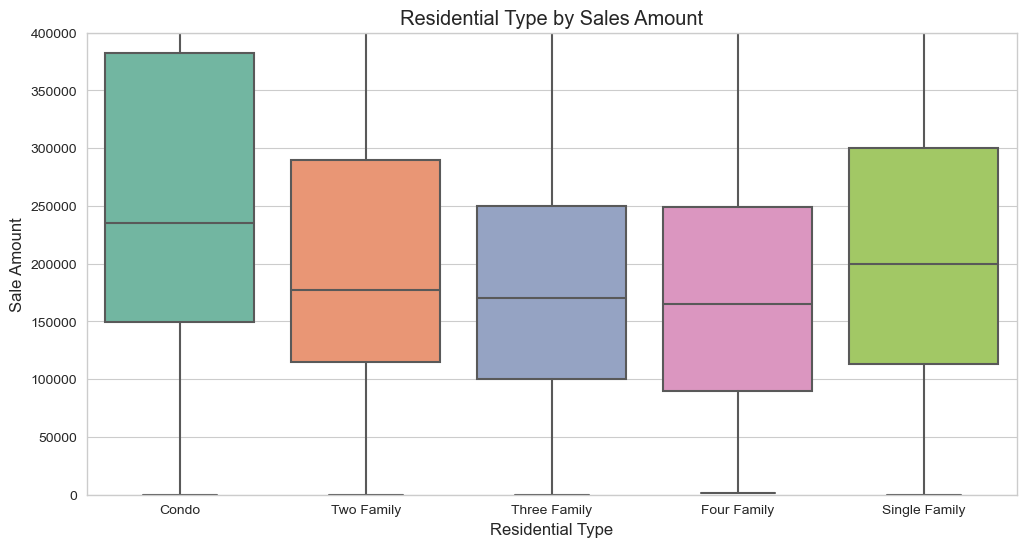

In [87]:
# Create a boxplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Residential Type', y = 'Sale Amount', data = data, palette = 'Set2')

# Add legend to the x-axis
plt.xticks(ticks = [0, 1,2,3,4], labels = ['Condo','Two Family','Three Family', 'Four Family','Single Family'])

# Set title and axis labels
plt.title('Residential Type by Sales Amount')
plt.xlabel('Residential Type')
plt.ylabel('Sale Amount')

# Display the plot
plt.ylim(0,400000)
plt.show()

- `Condos and Single Family` homes have higher mean sale amounts compared to other residential types.
- There is considerable variability in sale amounts within each residential type, as evidenced by the wide ranges and standard deviations.
- Anomalous values, such as the maximum sale amount for `Single Family homes`, may require further investigation to ensure data integrity.

# Multivariate Analysis

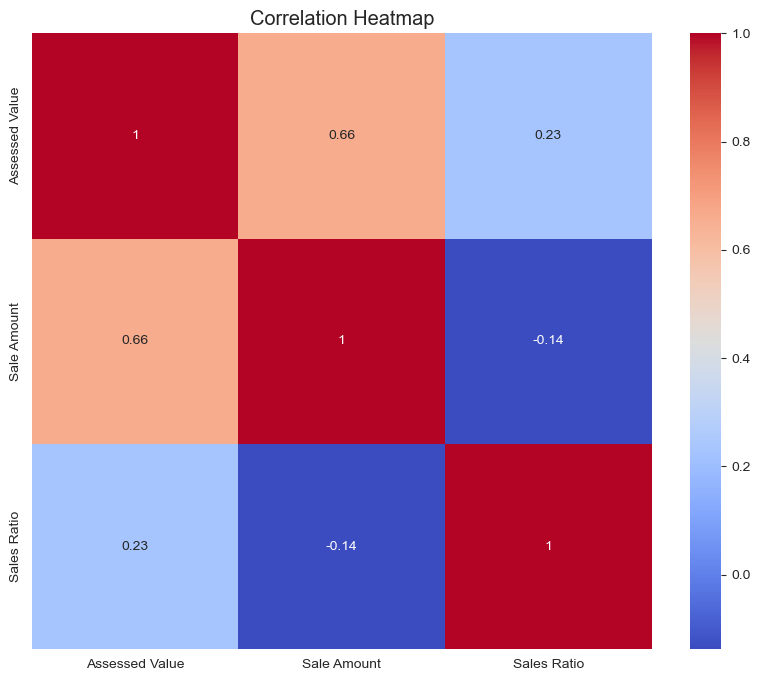

Pearson Correlation: 0.658


In [88]:
# The heatmap showing the correlation between the numerical features
plt.figure(figsize=(10,8))
columns=['Assessed Value','Sale Amount','Sales Ratio']

# Select the numerical features from the dataframe
numerical_features=data_merged[columns]

# Create a correlation matrix
corr_matrix=numerical_features.corr()

# Create a heatmap

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Add Pearson correlation to the plot
corr = data_merged['Sale Amount'].corr(data_merged['Assessed Value'])
print(f'Pearson Correlation: %.3f' %corr)

- The data indicates a weak positive correlation of 0.11 between the Assessed Value and Sale Amount variables. This suggests that there is a tendency for properties with higher assessed values to have higher sale amounts. However, the correlation is not robust enough to reliably predict sale amounts based solely on assessed values.

- In summary, while there is a positive correlation between assessed value and sale amount, its weakness suggests that assessed value alone may not serve as a strong predictor of sale amount. Other factors likely play significant roles in determining the sale amount of properties.

In [89]:
# Calculate the difference between assessed values and sale amounts
data_merged['Assessed_Sale_Difference'] = data_merged['Assessed Value'] - data_merged['Sale Amount']

count    997162.000000
mean     -90892.043990
std      106358.497982
min     -701000.000000
25%     -130780.000000
50%      -84960.000000
75%      -33970.000000
max      430900.000000
Name: Assessed_Sale_Difference, dtype: float64


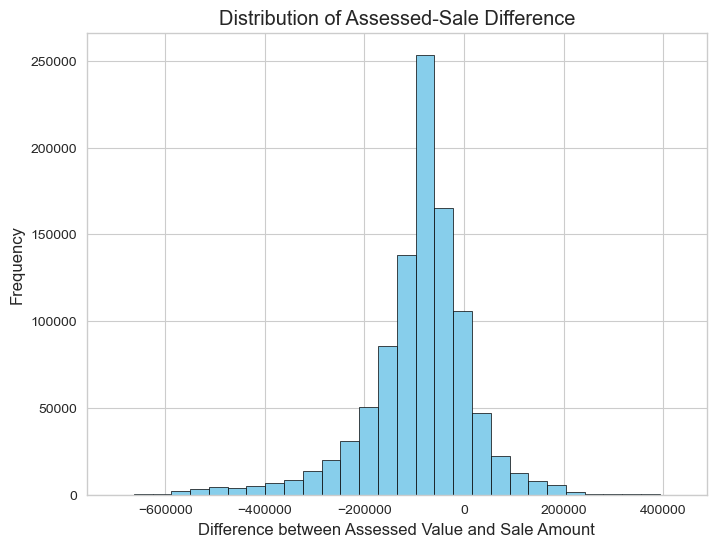

In [101]:
# Summary statistics of the difference between assessed values and sale amounts
print(data_merged['Assessed_Sale_Difference'].describe())

# Distribution of the difference
plt.figure(figsize=(8,6))
plt.hist(data_merged['Assessed_Sale_Difference'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Difference between Assessed Value and Sale Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Assessed-Sale Difference')
plt.show()

The distribution of the assessed sale difference indicates the variability between the assessed value and the actual sale amount of properties. Here's an interpretation based on the provided statistics:

- Count: There are 997,162 observations in the dataset, suggesting a substantial sample size for analysis.

- Mean: The mean assessed sale difference is approximately -$90,892. This negative value implies that, on average, the sale amount tends to be higher than the assessed value. In other words, properties tend to sell for more than their assessed values.

- Standard Deviation: The standard deviation of $106,358.50 indicates considerable variability in the differences between assessed values and sale amounts. The values are spread out around the mean, indicating that the differences vary widely across different properties.

- Minimum: The minimum assessed sale difference is -$701,000. This extreme negative value suggests that some properties were sold significantly below their assessed values.

- 25th Percentile (Q1): 25% of the assessed sale differences fall below -$130,780. This implies that a quarter of the properties sold had assessed values substantially higher than their sale amounts.

- Median (50th Percentile, Q2): The median assessed sale difference is approximately -$84,960. This suggests that half of the properties sold had assessed values below this amount, while the other half had assessed values above it.

- 75th Percentile (Q3): 75% of the assessed sale differences fall below -$33,970. This indicates that most properties sold had assessed values lower than their sale amounts, but with some variability.

- Maximum: The maximum assessed sale difference is $430,900. This extreme positive value indicates that some properties were sold significantly above their assessed values.

In [91]:
# Identify properties with high and low sales ratio
high_ratio_properties = data_merged[data_merged['Sales Ratio'] > 1.1].head(5)
low_ratio_properties = data_merged[data_merged['Sales Ratio'] < 0.9].head(5)

# Print summary of high and low ratio properties
print("Properties with high sales ratio:")
print(high_ratio_properties[['Address', 'Assessed Value', 'Sale Amount', 'Sales Ratio']])
print("\nProperties with low sales ratio:")
print(low_ratio_properties[['Address', 'Assessed Value', 'Sale Amount', 'Sales Ratio']])

Properties with high sales ratio:
                            Address  Assessed Value  Sale Amount  Sales Ratio
69                      HILLSIDE DR          5600.0       5000.0       1.1200
370              47 FLAGG HILL ROAD        203700.0     178000.0       1.1443
654            103 CHESTNUT HILL RD        226310.0     190000.0       1.1911
701  36 COLLINGRIDGE DRIVE & 40 COL         77000.0      65000.0       1.1846
818                85 TOWN HILL AVE        177300.0     146000.0       1.2143

Properties with low sales ratio:
                 Address  Assessed Value  Sale Amount  Sales Ratio
0        230 WAKELEE AVE        150500.0     325000.0       0.4630
1        390 TURNPIKE RD        253000.0     430000.0       0.5883
2       5 CHESTNUT DRIVE        130400.0     179900.0       0.7248
3  111 NORTHINGTON DRIVE        138390.0     225000.0       0.6958
4     70 FAR HILLS DRIVE        138390.0     225000.0       0.5957


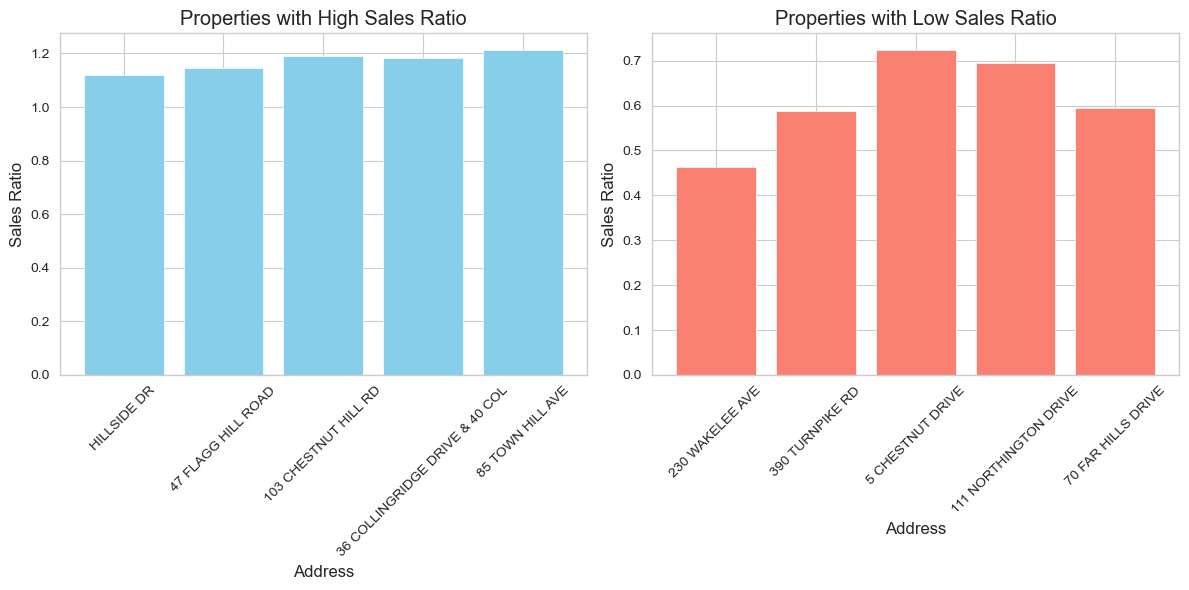

In [92]:
# plotting
plt.figure(figsize=(12,6))

# High sales ratio
plt.subplot(1, 2, 1)
addresses_high = high_ratio_properties['Address']  # Extract addresses from DataFrame
sales_ratios_high = high_ratio_properties['Sales Ratio']
plt.bar(addresses_high, sales_ratios_high, color='skyblue')
plt.title('Properties with High Sales Ratio')
plt.xlabel('Address')
plt.ylabel('Sales Ratio')
plt.xticks(rotation=45)

# Low sales ratio
plt.subplot(1, 2, 2)
addresses_low = low_ratio_properties['Address']  # Extract addresses from DataFrame
sales_ratios_low = low_ratio_properties['Sales Ratio']
plt.bar(addresses_low, sales_ratios_low, color='salmon')
plt.title('Properties with Low Sales Ratio')
plt.xlabel('Address')
plt.ylabel('Sales Ratio')
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [93]:
# Group data by town and calculate summary statistics
town_stats =data_merged.groupby('Town').agg({
    'Assessed Value': ['mean', 'median', 'std'],
    'Sale Amount': ['mean', 'median', 'std'],
    'Sales Ratio': ['mean', 'median', 'std']
})
# Group data by town
town_groups = data_merged.groupby('Town')

# Calculate mean assessed value, sale amount, and market ratio for each town
town_mean_values = town_groups.agg({'Assessed Value': 'mean', 'Sale Amount': 'mean', 'Sales Ratio': 'mean'}).reset_index()


In [94]:
town_stats

Assessed Value                            Sale Amount            \
                        mean    median           std           mean    median   
Town                                                                            
***Unknown***   66540.000000   66540.0           NaN  282450.000000  282450.0   
Andover        133353.430821  130400.0  73734.814891  216331.083183  215000.0   
Ansonia        121957.698088  116000.0  45378.882762  192893.094706  195000.0   
Ashford        106237.877256  105500.0  64455.015791  169279.765365  160000.0   
Avon           200712.041684  177190.0  91677.481745  320760.312989  280000.0   
...                      ...       ...           ...            ...       ...   
Windsor Locks  104688.700506  105140.0  48827.428300  178249.693755  171900.0   
Wolcott        141917.565049  133270.0  69994.817211  217686.052211  202000.0   
Woodbridge     226785.596561  225050.0  89663.097317  350047.260696  342000.0   
Woodbury       174788.530379  156600.0  99982.108454  272044.614617  235000.0   
Woodstock      125264.380088  120190.0  84177.439957  204972.710714  195000.0   

                             Sales Ratio                      
                         std        mean    median       std  
Town                                                          
***Unknown***            NaN    0.235582  0.235582       NaN  
Andover        123748.697416    0.633889  0.624600  0.202817  
Ansonia         88679.056029    0.623238  0.624600  0.200511  
Ashford        105921.422542    0.607481  0.624600  0.209768  
Avon           151789.044708    0.643356  0.629759  0.158735  
...                      ...         ...       ...       ...  
Windsor Locks   80032.886868    0.603348  0.608333  0.191025  
Wolcott        108473.880241    0.643298  0.624600  0.212246  
Woodbridge     149619.018280    0.658581  0.644700  0.162244  
Woodbury       157111.612055    0.633580  0.624600  0.204296  
Woodstock      134301.777346    0.603742  0.624600  0.206519  

[170 rows x 9 columns]

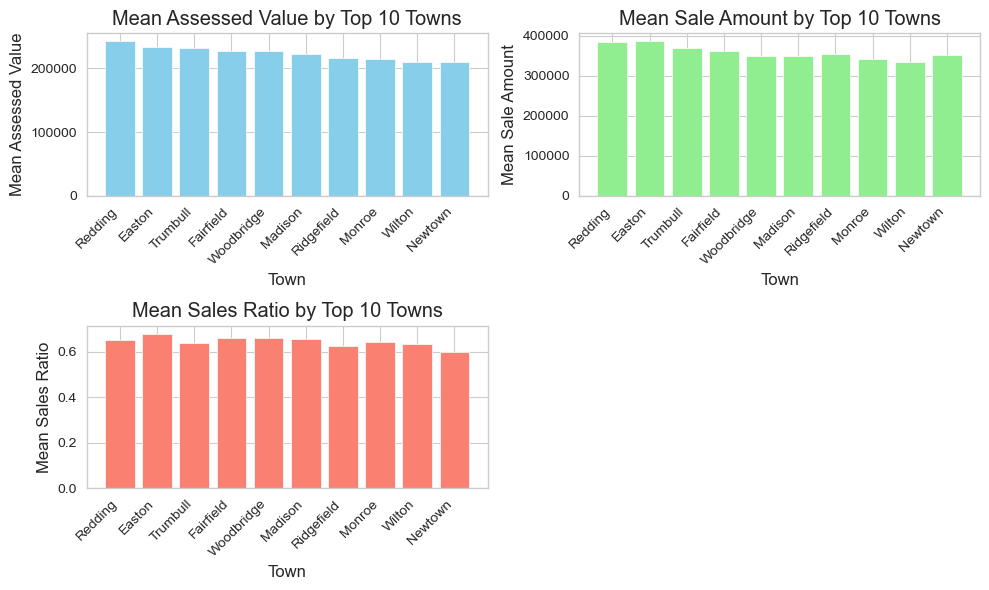

In [106]:
# Sort towns based on mean assessed value
top_10_towns = town_mean_values.sort_values(by='Assessed Value', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))

# Assessed Value by Town
plt.subplot(2, 2, 1)
plt.bar(top_10_towns['Town'], top_10_towns['Assessed Value'], color='skyblue')
plt.title('Mean Assessed Value by Top 10 Towns')
plt.xlabel('Town')
plt.ylabel('Mean Assessed Value')
plt.xticks(rotation=45, ha='right')

# Sale Amount by Town
plt.subplot(2, 2, 2)
plt.bar(top_10_towns['Town'], top_10_towns['Sale Amount'], color='lightgreen')
plt.title('Mean Sale Amount by Top 10 Towns')
plt.xlabel('Town')
plt.ylabel('Mean Sale Amount')
plt.xticks(rotation=45, ha='right')

# Market Ratio by Town
plt.subplot(2, 2, 3)
plt.bar(top_10_towns['Town'], top_10_towns['Sales Ratio'], color='salmon')
plt.title('Mean Sales Ratio by Top 10 Towns')
plt.xlabel('Town')
plt.ylabel('Mean Sales Ratio')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

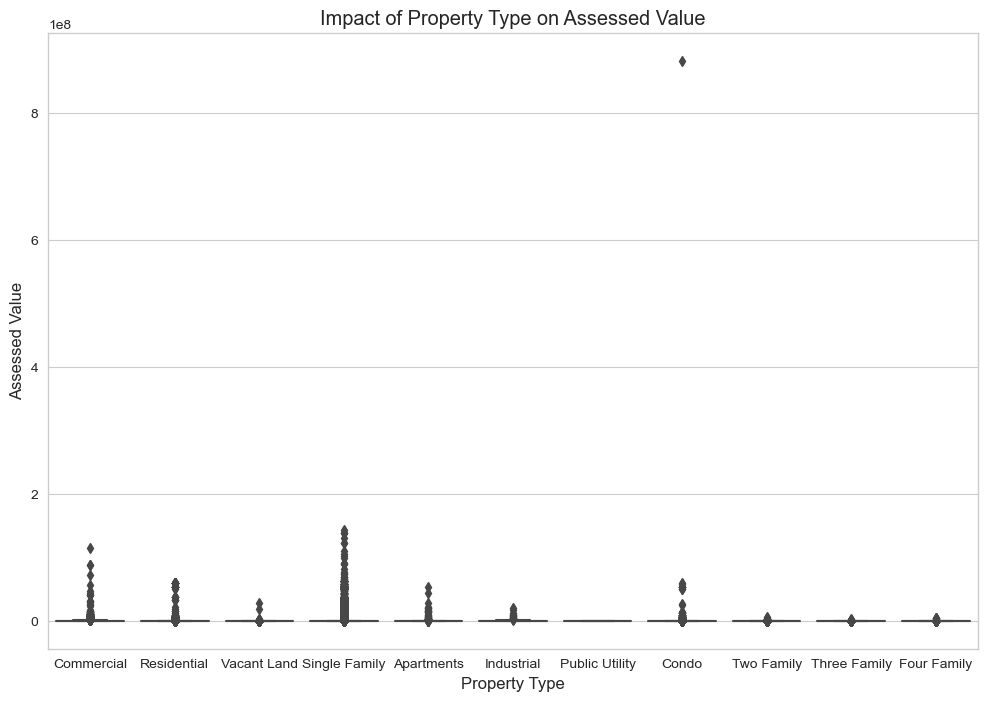

In [96]:
# Group data by property type and calculate summary statistics
property_type_stats =data_merged.groupby('Property Type').agg({
    'Assessed Value': ['mean', 'median', 'std'],
    'Sale Amount': ['mean', 'median', 'std'],
    # You can include additional attributes here for analysis
})

# Flatten the multi-index columns
property_type_stats.columns = [' '.join(col).strip() for col in property_type_stats.columns.values]

# Visualize impact of property type on assessment accuracy and market trends
plt.figure(figsize=(12, 8))
sns.boxplot(x='Property Type', y='Assessed Value', data=data)
plt.title('Impact of Property Type on Assessed Value')
plt.xlabel('Property Type')
plt.ylabel('Assessed Value')
plt.show()

In [97]:
property_type_stats

,Assessed Value mean,Assessed Value median,Assessed Value std,Sale Amount mean,Sale Amount median,Sale Amount std
Property Type,,,,,,
Apartments,165128.635802,138390.0,84178.101116,289743.174897,240000.0,136330.630443
Commercial,177645.933872,138390.0,87836.451492,260184.138314,225000.0,145897.584186
Condo,128853.260295,114290.0,79102.491756,203497.494994,175000.0,129583.813790
Four Family,164091.126047,150635.0,69236.573802,205529.474884,189450.0,130680.861855
Industrial,155890.530702,138390.0,67611.075427,264662.460526,225000.0,146366.566540
Public Utility,73466.000000,42200.0,59188.776216,134708.800000,59950.0,127895.898438
Residential,162122.586188,138390.0,84109.002997,284502.263376,245000.0,141181.883432
Single Family,147195.025236,138390.0,86146.455596,240505.526797,225000.0,141409.080436
Three Family,130112.020737,123780.0,66684.834666,171376.741379,153000.0,116338.379418


-The dataset provides statistics on assessed value and sale amount for different property types. For instance, Apartments have a mean assessed value of $165,128 and a median of $138,390, with a mean sale amount of $289,743. Commercial properties show a mean assessed value of $177,645 and a median of $138,390, with a mean sale amount of $260,184.

The data reveals variations in property values and sales amounts across different property types. For example, Residential properties have a higher mean assessed value compared to Public Utility properties. The standard deviation for assessed value and sale amount indicates the dispersion of data points around the mean. This information can be valuable for understanding the real estate market trends and making informed decisions based on property types.

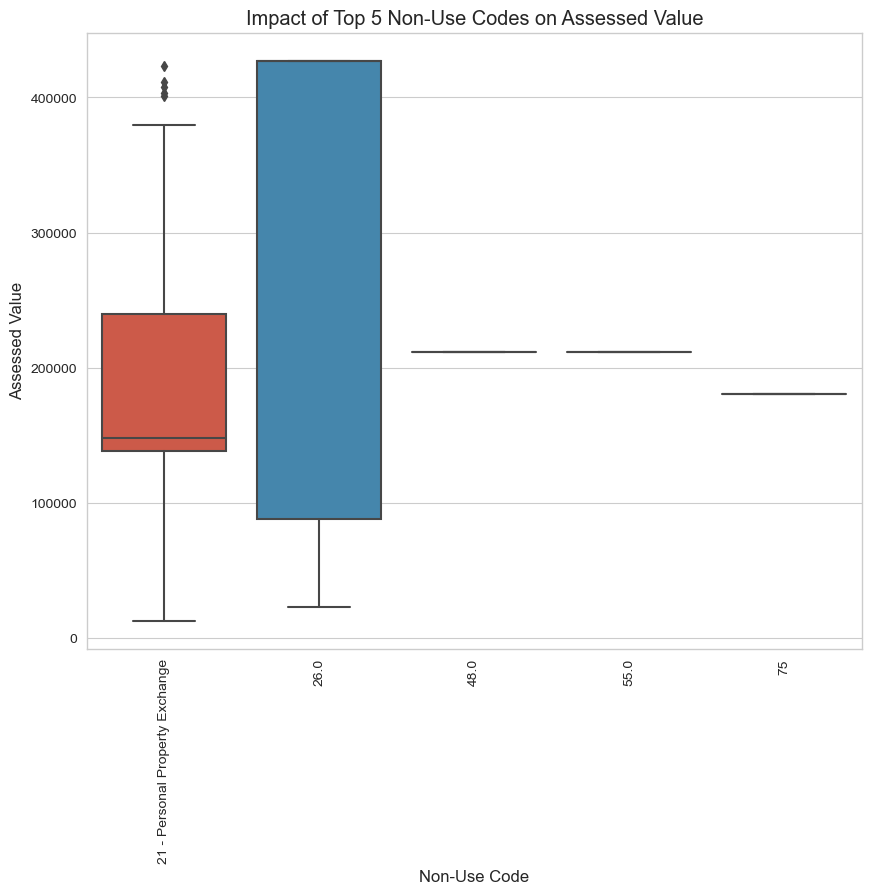

In [107]:
# Calculate statistics for non-use codes
non_use_code_stats = data_merged.groupby('Non Use Code').agg({
    'Assessed Value': ['mean', 'median', 'std'],
    'Sale Amount': ['mean', 'median', 'std']
})

# Flatten the multi-index columns
non_use_code_stats.columns = [' '.join(col).strip() for col in non_use_code_stats.columns.values]

# Select top 5 non-use codes based on the mean assessed value
top_5_non_use_codes = non_use_code_stats['Assessed Value mean'].nlargest(5).index

# Filter the data for the top 5 non-use codes
data_top_5 = data_merged[data_merged['Non Use Code'].isin(top_5_non_use_codes)]

# Visualize impact of top 5 non-use codes on assessment accuracy and market trends
plt.figure(figsize=(10, 8))
sns.boxplot(x='Non Use Code', y='Assessed Value', data=data_top_5)
plt.title('Impact of Top 5 Non-Use Codes on Assessed Value')
plt.xlabel('Non-Use Code')
plt.ylabel('Assessed Value') 
plt.xticks(rotation=90)
plt.show()

In [99]:
non_use_code_stats

,Assessed Value mean,Assessed Value median,Assessed Value std,Sale Amount mean,Sale Amount median,Sale Amount std
Non Use Code,,,,,,
1.0,112745.365032,97630.0,70202.940972,145062.985471,128000.0,112815.389622
2.0,118806.637681,95800.0,88354.126992,58844.840580,13500.0,101974.073991
3.0,112928.140861,89963.5,95110.605226,156896.520373,102450.0,148290.533399
4.0,137163.555901,114500.0,101687.251132,181234.118012,133000.0,177049.201361
5.0,115632.000000,85800.0,105653.250739,168594.520000,150000.0,159642.275732
...,...,...,...,...,...,...
75,180740.000000,180740.0,NaN,69900.000000,69900.0,NaN
8,114657.516667,99825.0,78533.830622,103366.951724,66000.0,111468.723557
88,43400.000000,43400.0,NaN,70000.000000,70000.0,NaN



- The dataset provides statistics on assessed value and sale amount based on different non-use codes. For instance, non-use code 1.0 has a mean assessed value of $112,745 and a median of $97,630, with a mean sale amount of $145,062. Non-use code 2.0 shows a mean assessed value of $118,807 and a median of $95,800, with a mean sale amount of $58,845.

- The data reveals variations in property values and sale amounts across different non-use codes. For example, non-use code 4.0 has a higher mean assessed value compared to non-use code 9. The standard deviation for assessed value and sale amount indicates the dispersion of data points around the mean.

# Recommedation 

- `Assessed Value Comparison`: Pay attention to towns with higher mean assessed values as they may indicate areas with potentially higher property values and investment opportunities.
- `Sale Amount Analysis`: Look  into towns with higher mean sale amounts, as they could represent areas where properties are selling at higher prices, indicating demand and potential returns on investment.
- `Sales Ratio Evaluation`: Consider the mean sales ratios in each town to assess how properties are being valued in relation to their sale prices. Lower sales ratios may suggest undervalued properties, while higher ratios could indicate overvaluation.
- `Diversification`: Consider diversifying your real estate investment portfolio across different towns based on the insights gained from the top 10 towns' data. This can help spread risk and capture potential opportunities in various markets.




